# MMS burst events

This notebook demonstrates various strategies for working with the MMS burst mode intervals, including:
- Loading the burst intervals for a time range into `numpy` arrays
- Plotting the burst intervals
- List the burst mode segment selections from the SITL database
- Highlight and zoom into a burst interval from the SITL database
- Load and plot the burst data for the selected interval

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pyspedas

In [3]:
trange = ['2015-10-16', '2015-10-17']

Load some FGM data for the full day

In [4]:
pyspedas.projects.mms.fgm(trange=trange)

01-Feb-25 12:37:39: Loading pydata/mms1/fgm/srvy/l2/2015/10/mms1_fgm_srvy_l2_20151016_v4.18.0.cdf


['Epoch',
 'mms1_fgm_b_gse_srvy_l2',
 'mms1_fgm_b_gsm_srvy_l2',
 'mms1_fgm_b_dmpa_srvy_l2',
 'mms1_fgm_b_bcs_srvy_l2',
 'mms1_fgm_flag_srvy_l2',
 'Epoch_state',
 'mms1_fgm_hirange_srvy_l2',
 'mms1_fgm_bdeltahalf_srvy_l2',
 'mms1_fgm_stemp_srvy_l2',
 'mms1_fgm_etemp_srvy_l2',
 'mms1_fgm_mode_srvy_l2',
 'mms1_fgm_b_dmpa_srvy_l2_bvec',
 'mms1_fgm_b_dmpa_srvy_l2_btot',
 'mms1_fgm_b_gse_srvy_l2_bvec',
 'mms1_fgm_b_gse_srvy_l2_btot',
 'mms1_fgm_b_gsm_srvy_l2_bvec',
 'mms1_fgm_b_gsm_srvy_l2_btot',
 'mms1_fgm_b_bcs_srvy_l2_bvec',
 'mms1_fgm_b_bcs_srvy_l2_btot']

Load the burst mode segments

In [7]:
from pyspedas.projects.mms.mms_load_brst_segments import mms_load_brst_segments

In [8]:
starts, ends = mms_load_brst_segments(trange=trange)

01-Feb-25 12:39:07: Downloading updates for 01-Mar-2015 - 28-Aug-2015
01-Feb-25 12:39:07: Downloading https://lasp.colorado.edu/mms/sdc/public/service/latis/mms_burst_data_segment.csv?FINISHTIME>=01-Mar-2015+&FINISHTIME<28-Aug-2015 to /Users/jwl/PycharmProjects/mms-examples/basic/pydata/mms_burst_data_segment.csv
01-Feb-25 12:39:07: Download complete: /Users/jwl/PycharmProjects/mms-examples/basic/pydata/mms_burst_data_segment.csv
01-Feb-25 12:39:08: Downloading https://cdf.gsfc.nasa.gov/html/CDFLeapSeconds.txt to data/CDFLeapSeconds.txt
01-Feb-25 12:39:08: Download complete: data/CDFLeapSeconds.txt
01-Feb-25 12:39:08: Done grabbing updates for 01-Mar-2015-28-Aug-2015
01-Feb-25 12:39:08: Downloading updates for 28-Aug-2015 - 24-Feb-2016
01-Feb-25 12:39:09: Downloading https://lasp.colorado.edu/mms/sdc/public/service/latis/mms_burst_data_segment.csv?FINISHTIME>=28-Aug-2015+&FINISHTIME<24-Feb-2016 to /Users/jwl/PycharmProjects/mms-examples/basic/pydata/mms_burst_data_segment.csv
01-Feb-25

The burst mode start times as stored in `starts` an the end times are stored in `ends`

In [9]:
starts[0:5]

array([1.44497517e+09, 1.44497524e+09, 1.44497532e+09, 1.44497646e+09,
       1.44498226e+09])

In [10]:
ends[0:5]

array([1.44497524e+09, 1.44497532e+09, 1.44497539e+09, 1.44497651e+09,
       1.44498238e+09])

Plot the FGM data with the burst segments (green bars at the top of the figure)

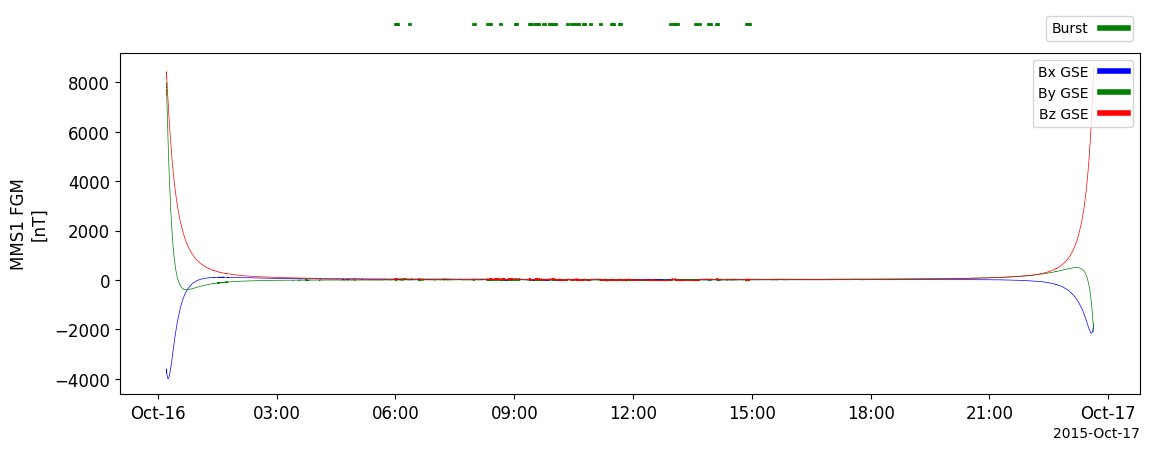

In [11]:
from pyspedas import tplot

tplot(['mms_bss_burst', 'mms1_fgm_b_gse_srvy_l2_bvec'])

Print the burst mode segment selections from the SITL database

In [12]:
from pyspedas.projects.mms.mms_events import mms_brst_events

In [13]:
mms_brst_events(trange=trange)

Highlight the "Full MP With Jet and B Minima" interval

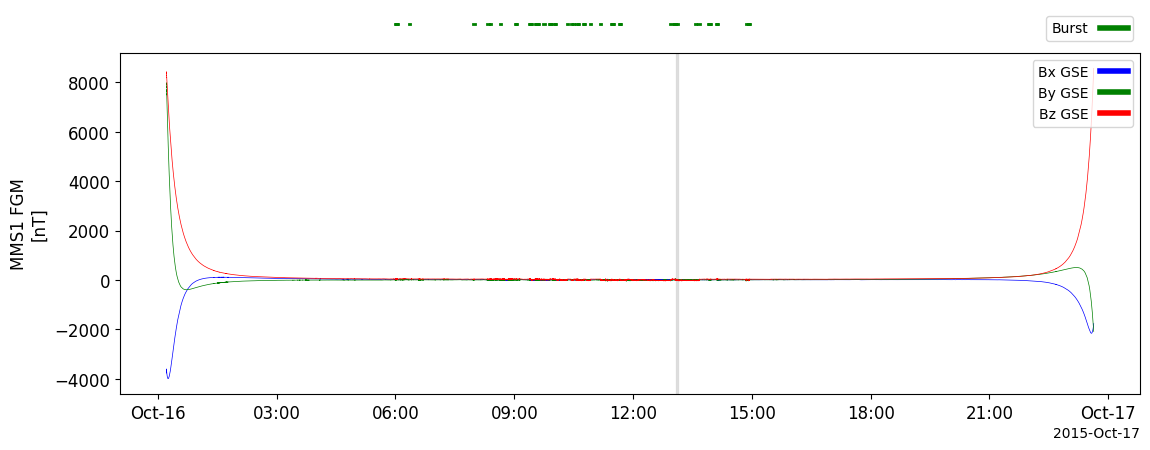

In [14]:
from pyspedas import highlight

mp = pyspedas.time_double(['2015-10-16/13:05:24', '2015-10-16/13:07:34'])

highlight(['mms1_fgm_b_gse_srvy_l2_bvec'], mp)

tplot(['mms_bss_burst', 'mms1_fgm_b_gse_srvy_l2_bvec'])

Zoom in for a closer look



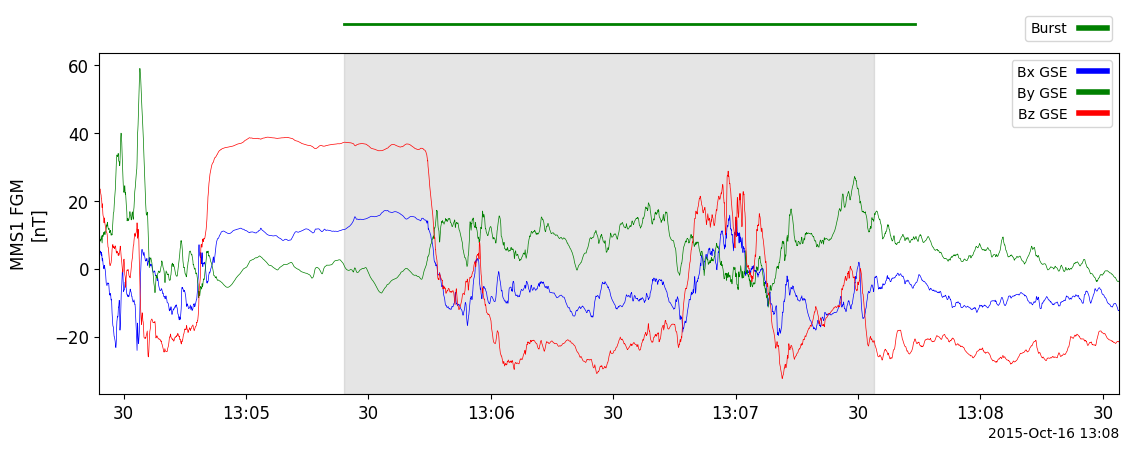

In [15]:
from pyspedas import tlimit

tlimit([mp[0]-60.0, mp[1]+60.0])

tplot(['mms_bss_burst', 'mms1_fgm_b_gse_srvy_l2_bvec'])

Load the burst mode FGM data

In [16]:
pyspedas.projects.mms.fgm(trange=mp, data_rate='brst', time_clip=True)

01-Feb-25 12:40:27: Downloading mms1_fgm_brst_l2_20151016130334_v4.18.1.cdf to pydata/mms1/fgm/brst/l2/2015/10/16
01-Feb-25 12:40:28: Downloading mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf to pydata/mms1/fgm/brst/l2/2015/10/16


['Epoch',
 'mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gsm_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2',
 'mms1_fgm_b_bcs_brst_l2',
 'mms1_fgm_flag_brst_l2',
 'Epoch_state',
 'mms1_fgm_hirange_brst_l2',
 'mms1_fgm_bdeltahalf_brst_l2',
 'mms1_fgm_stemp_brst_l2',
 'mms1_fgm_etemp_brst_l2',
 'mms1_fgm_mode_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2_bvec',
 'mms1_fgm_b_dmpa_brst_l2_btot',
 'mms1_fgm_b_gse_brst_l2_bvec',
 'mms1_fgm_b_gse_brst_l2_btot',
 'mms1_fgm_b_gsm_brst_l2_bvec',
 'mms1_fgm_b_gsm_brst_l2_btot',
 'mms1_fgm_b_bcs_brst_l2_bvec',
 'mms1_fgm_b_bcs_brst_l2_btot']

Plot the burst mode FGM data

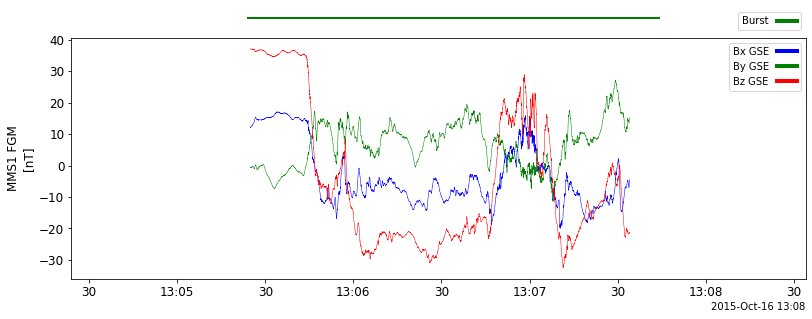

In [15]:
tplot(['mms_bss_burst', 'mms1_fgm_b_gse_brst_l2_bvec'])

Compare the time stamps (survey mode vs. burst mode)

In [ ]:
from pyspedas import get_data

In [ ]:
brst = get_data('mms1_fgm_b_gse_brst_l2_bvec')
srvy = get_data('mms1_fgm_b_gse_srvy_l2_bvec')

Survey mode: data point every 0.125 seconds

In [18]:
srvy.times[1]-srvy.times[0]

0.1250009536743164

Burst mode: data point every 0.0078 seconds (where data are available)

In [19]:
brst.times[1]-brst.times[0]

0.007812023162841797